## Explore Weather Trends
**Summary**
In this project, I'll analyze local and global temperature data and compare the temperature trends where i live(Santa Clara) to overall global temperature trends.

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data


In [6]:
city_data = pd.read_csv('./Data/city_data.csv')
city_list = pd.read_csv('./Data/city_list.csv')
global_data = pd.read_csv('./Data/global_data.csv')

In [51]:
# Subset the city_data for the city i live (San Jose)
local = city_data.loc[city_data.city == 'San Jose',:]

In [52]:
# Trucate the global_data for the same time spots 
global_data2 = global_data.loc[(global_data.year >= local.year.min())\
                             & (global_data.year <= local.year.max()),:]

In [53]:
# Quality check
if global_data2.year.min() == local.year.min():
    if global_data2.year.max() == local.year.max():
        print("PASSED: global data ({}-{}) & city data ({}-{}) in same time frame".format(global_data2.year.min(),global_data2.year.max(), local.year.min(), local.year.max()))
    else:
        print("Failed: difference in global data ({}-{}) & city data ({}-{}) ".format(global_data2.year.min(),global_data2.year.max(), local.year.min(), local.year.max()))
else:
    print("Failed: difference in global data ({}-{}) & city data ({}-{}) ".format(global_data2.year.min(),global_data2.year.max(), local.year.min(), local.year.max()))

PASSED: global data (1849-2013) & city data (1849-2013) in same time frame


### Get the moving average (10 year) 

In [56]:
global_ma = global_data2.avg_temp.rolling(window=10).mean()
local_ma = local.avg_temp.rolling(window=10).mean()

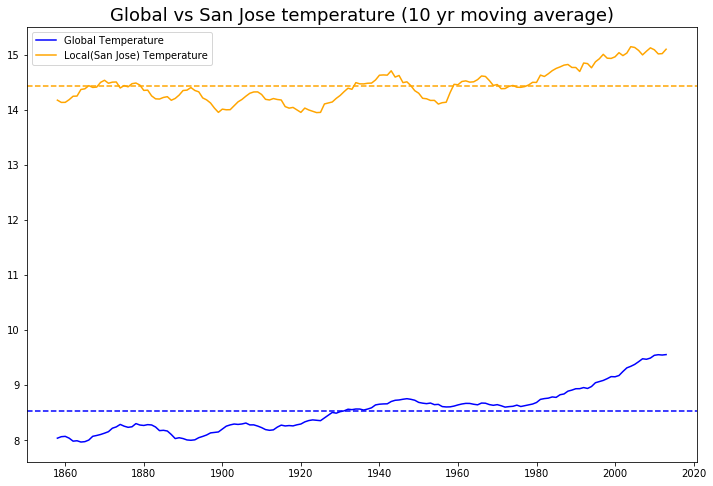

In [112]:
# Plot the line chart
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Global vs San Jose temperature (10 yr moving average)', fontsize =18)
plt.plot(global_data2.year, global_ma, \
        label ='Global Temperature',\
        color ='blue' )
ax.axhline(y=global_ma.mean(), color = 'blue', ls ='dashed')

plt.plot(local.year, local_ma, \
        label ='Local(San Jose) Temperature',\
        color = 'orange' )
plt.legend(loc='upper left')
ax.axhline(y=local_ma.mean(), color = 'orange', ls ='dashed')
plt.show()

### Observations

1) The city I live (San Jose) is cooler on average (6 ºC) compared to the global average. Its a difference consistent over time.    

2) Overall, both the city I live and the global weather are getting hotter since the 1860.   

3) During the period, the temperature of city I live increased more than the global temperature (local: around 2ºC  vs global: 1 ºC)

4) The global temperature fluctuates more than the temperature of the city i live.   
